In [25]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [26]:
# Let's read in the data.
df = spark.read.option("header", "true").csv('Datasets/global-data-on-sustainable-energy.csv')
df2 = spark.read.option("header", "true").csv('Datasets/annual-co2-emissions-per-country.csv')

## 2.2 Dataset Information

In [27]:
# The show method allows you visualise DataFrames. We can see that there are two columns. 
df.show()

# You could also try this. 
df.columns

+-----------+----+---------------------------------------+---------------------------------+----------------------------------------------------+----------------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+--------------------------------------+--------------------------------------------------+-----------------------------------------------------------+---------------------------------+----------------------------------------+-----------+--------------+--------------+--------------+--------+---------+
|     Entity|Year|Access to electricity (% of population)|Access to clean fuels for cooking|Renewable-electricity-generating-capacity-per-capita|Financial flows to developing countries (US $)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from

['Entity',
 'Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [28]:
num_rows = df.count()
print(f"Number of rows: {num_rows}")

num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 3649
Number of columns: 21


In [29]:
# For type, we can use print schema. 
# But wait! What if you want to change the format of the data? Maybe change age to an integer instead of long?
df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Access to electricity (% of population): string (nullable = true)
 |-- Access to clean fuels for cooking: string (nullable = true)
 |-- Renewable-electricity-generating-capacity-per-capita: string (nullable = true)
 |-- Financial flows to developing countries (US $): string (nullable = true)
 |-- Renewable energy share in the total final energy consumption (%): string (nullable = true)
 |-- Electricity from fossil fuels (TWh): string (nullable = true)
 |-- Electricity from nuclear (TWh): string (nullable = true)
 |-- Electricity from renewables (TWh): string (nullable = true)
 |-- Low-carbon electricity (% electricity): string (nullable = true)
 |-- Primary energy consumption per capita (kWh/person): string (nullable = true)
 |-- Energy intensity level of primary energy (MJ/$2017 PPP GDP): string (nullable = true)
 |-- Value_co2_emissions_kt_by_country: string (nullable = true)
 |-- Renewables (% equiva

## Data Manipulation

In [30]:
# Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,FloatType,StructType)

In [31]:
# Then create a variable with the correct structure.
data_schema = [StructField('Entity',StringType(),True),
              StructField('Year',IntegerType(),True),
               StructField('Access to electricity (% of population)',FloatType(),True),
               StructField('Access to clean fuels for cooking',FloatType(),True),
               StructField('Renewable-electricity-generating-capacity-per-capita',FloatType(),True),
               StructField('Financial flows to developing countries (US $)',IntegerType(),True),
               StructField('Renewable energy share in the total final energy consumption (%)',FloatType(),True),
               StructField('Electricity from fossil fuels (TWh)',FloatType(),True),
               StructField('Electricity from nuclear (TWh)',FloatType(),True),
               StructField('Electricity from renewables (TWh)',FloatType(),True),
               StructField('Low-carbon electricity (% electricity)',FloatType(),True),
               StructField('Primary energy consumption per capita (kWh/person)',FloatType(),True),
               StructField('Energy intensity level of primary energy (MJ/$2017 PPP GDP)',FloatType(),True),
               StructField('Value_co2_emissions_kt_by_country',FloatType(),True),
               StructField('Renewables (% equivalent primary energy)',FloatType(),True),
               StructField('gdp_growth',FloatType(),True),
               StructField('gdp_per_capita',FloatType(),True),
               StructField('Density(P/Km2)',IntegerType(),True),
               StructField('Land Area(Km2)',IntegerType(),True),
               StructField('Latitude',FloatType(),True),
               StructField('Longitude',FloatType(),True),
              ]

final_struct = StructType(fields=data_schema)

In [32]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 
df = spark.read.option("header", "true").csv('Datasets/global-data-on-sustainable-energy.csv', schema=final_struct)
df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Access to electricity (% of population): float (nullable = true)
 |-- Access to clean fuels for cooking: float (nullable = true)
 |-- Renewable-electricity-generating-capacity-per-capita: float (nullable = true)
 |-- Financial flows to developing countries (US $): integer (nullable = true)
 |-- Renewable energy share in the total final energy consumption (%): float (nullable = true)
 |-- Electricity from fossil fuels (TWh): float (nullable = true)
 |-- Electricity from nuclear (TWh): float (nullable = true)
 |-- Electricity from renewables (TWh): float (nullable = true)
 |-- Low-carbon electricity (% electricity): float (nullable = true)
 |-- Primary energy consumption per capita (kWh/person): float (nullable = true)
 |-- Energy intensity level of primary energy (MJ/$2017 PPP GDP): float (nullable = true)
 |-- Value_co2_emissions_kt_by_country: float (nullable = true)
 |-- Renewables (% equivalent prim

In [33]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
# But what about data type?
# df.describe().show()

stats_df = df.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

from IPython.display import display

# Display the transposed DataFrame
display(transposed_stats_pd)


,0,1,2,3,4
summary,count,mean,stddev,min,max
Entity,3649,None,None,Afghanistan,Zimbabwe
Year,3649,2010.0383666758016,6.054228365650764,2000,2020
Access to electricity (% of population),3639,78.93370218462393,30.27554143208654,1.2522693,100.0
Access to clean fuels for cooking,3480,63.25528734745993,39.04365758993957,0.0,100.0
Renewable-electricity-generating-capacity-per-capita,2718,113.13749808244985,244.16725470613554,0.0,3060.19
Financial flows to developing countries (US $),1555,8.284976205787781E7,2.135290375742725E8,0,2112780000
Renewable energy share in the total final energy consumption (%),3455,32.6381649511784,29.894901331793534,0.0,96.04
Electricity from fossil fuels (TWh),3628,70.3650024256478,348.0518635136442,0.0,5184.13
Electricity from nuclear (TWh),3523,13.450190180841238,73.00662308995312,0.0,809.41


In [34]:
# Count unique values for a specific column
column_name = "Entity"
unique_count = df.select(column_name).distinct().count()
print(f"Number of unique countries in dataset '{column_name}': {unique_count}")

Number of unique countries in dataset 'Entity': 176


In [35]:
# The show method allows you visualise DataFrames. We can see that there are two columns. 
df2.show()

# You could also try this. 
df2.columns

+-----------+----+----+--------------------+
|     Entity|Code|Year|Annual CO₂ emissions|
+-----------+----+----+--------------------+
|Afghanistan| AFG|1949|               14656|
|Afghanistan| AFG|1950|               84272|
|Afghanistan| AFG|1951|               91600|
|Afghanistan| AFG|1952|               91600|
|Afghanistan| AFG|1953|              106256|
|Afghanistan| AFG|1954|              106256|
|Afghanistan| AFG|1955|              153888|
|Afghanistan| AFG|1956|              183200|
|Afghanistan| AFG|1957|              293120|
|Afghanistan| AFG|1958|              329760|
|Afghanistan| AFG|1959|              384571|
|Afghanistan| AFG|1960|              413885|
|Afghanistan| AFG|1961|              490798|
|Afghanistan| AFG|1962|              688594|
|Afghanistan| AFG|1963|              706736|
|Afghanistan| AFG|1964|              838551|
|Afghanistan| AFG|1965|             1006917|
|Afghanistan| AFG|1966|             1091159|
|Afghanistan| AFG|1967|             1281865|
|Afghanist

['Entity', 'Code', 'Year', 'Annual CO₂ emissions']

In [37]:
num_rows = df2.count()
print(f"Number of rows: {num_rows}")

num_columns = len(df2.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 30308
Number of columns: 4


In [38]:
# For type, we can use print schema. 
# But wait! What if you want to change the format of the data? Maybe change age to an integer instead of long?
df2.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Annual CO₂ emissions: string (nullable = true)



## Data Manipulation

In [45]:
# Then create a variable with the correct structure.
data2_schema = [StructField('Entity',StringType(),True),
               StructField('Code',StringType(),True),
                StructField('Year',IntegerType(),True),
               StructField('Annual CO₂ emissions',FloatType(),True)
              ]

final2_struct = StructType(fields=data2_schema)

In [46]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 
df2 = spark.read.option("header", "true").csv('Datasets/annual-co2-emissions-per-country.csv', schema=final2_struct)
df2.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Annual CO₂ emissions: float (nullable = true)



In [47]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
# But what about data type?
df2.describe().show()

+-------+-----------+-----+------------------+--------------------+
|summary|     Entity| Code|              Year|Annual CO₂ emissions|
+-------+-----------+-----+------------------+--------------------+
|  count|      30308|24157|             30308|               30308|
|   mean|       null| null|1940.1913356209582|3.9127215594534516E8|
| stddev|       null| null| 65.51023156216606|1.8558246627678738E9|
|    min|Afghanistan|  ABW|              1750|                 0.0|
|    max|   Zimbabwe|  ZWE|              2022|        3.7149786E10|
+-------+-----------+-----+------------------+--------------------+



## 2.3 Data Exploration

In [48]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Group by country and calculate the mean CO2 emissions
mean_co2_df = df.groupBy("Entity").agg(avg(col("Value_co2_emissions_kt_by_country")).alias("Mean_CO2_Emissions"))

# Convert to Pandas DataFrame for plotting
mean_co2_pd = mean_co2_df.toPandas()


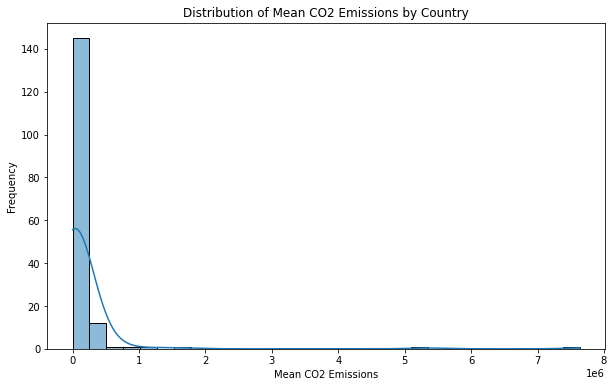

In [50]:
# Plot the distribution of mean CO2 emissions
plt.figure(figsize=(10, 6))
sns.histplot(mean_co2_pd["Mean_CO2_Emissions"], bins=30, kde=True)
plt.title("Distribution of Mean CO2 Emissions by Country")
plt.xlabel("Mean CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

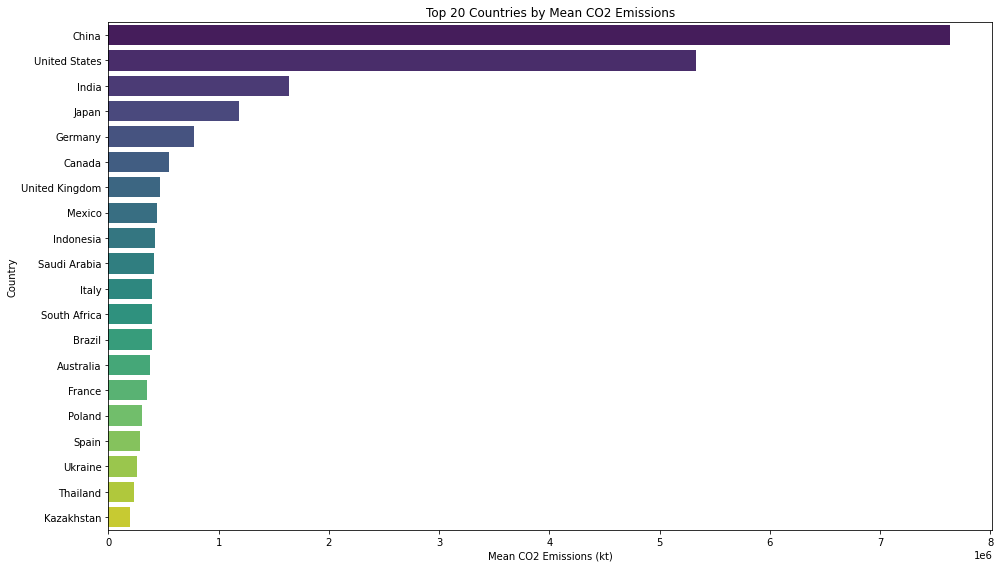

In [51]:
mean_co2_pd_sorted = mean_co2_pd.sort_values(by="Mean_CO2_Emissions", ascending=False)

# Select only the top 20 countries
top_20_countries = mean_co2_pd_sorted.head(20)

# Plot the distribution of the top 20 countries
plt.figure(figsize=(14, 8))
sns.barplot(x="Mean_CO2_Emissions", y="Entity", data=top_20_countries, palette="viridis")
plt.title("Top 20 Countries by Mean CO2 Emissions")
plt.xlabel("Mean CO2 Emissions (kt)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [63]:
# Compute correlations for all columns of interest
correlations = []
columns_of_interest = [
    "Electricity from fossil fuels (TWh)",
    "Density(P/Km2)",
    "Access to electricity (% of population)",
    "Access to clean fuels for cooking",
    "Renewable-electricity-generating-capacity-per-capita",
    "Financial flows to developing countries (US $)",
    "Renewable energy share in the total final energy consumption (%)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Low-carbon electricity (% electricity)",
    "Primary energy consumption per capita (kWh/person)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "gdp_growth",
    "Renewables (% equivalent primary energy)",
    "gdp_per_capita",
    "Land Area(Km2)",
    "Latitude",
    "Longitude"
]

for column in columns_of_interest:
    correlation = df.corr("Value_co2_emissions_kt_by_country", column)
    correlations.append((column, correlation))

# Create a DataFrame or RDD with correlation values and corresponding column names
correlation_df = spark.createDataFrame(correlations, ["Column", "Correlation"])

# Sort the DataFrame by correlation values in descending order
sorted_correlation_df = correlation_df.orderBy(col("Correlation").desc())

from pyspark.sql.functions import abs

# Sort the DataFrame by absolute correlation values in descending order
sorted_abs_correlation_df = sorted_abs_correlation_df.orderBy("Absolute Correlation", ascending=False)

# Set the maximum column width to a larger value
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 100)
spark.conf.set("spark.sql.repl.eagerEval.maxNumCols", 100)

# Display the sorted table
sorted_abs_correlation_df.show(truncate=False)

+----------------------------------------------------------------+--------------------+--------------------+
|Column                                                          |Correlation         |Absolute Correlation|
+----------------------------------------------------------------+--------------------+--------------------+
|Electricity from fossil fuels (TWh)                             |0.9481763559733735  |0.9481763559733735  |
|Electricity from renewables (TWh)                               |0.7854913009453646  |0.7854913009453646  |
|Land Area(Km2)                                                  |0.6341015263961219  |0.6341015263961219  |
|Electricity from nuclear (TWh)                                  |0.5830326881392291  |0.5830326881392291  |
|Financial flows to developing countries (US $)                  |0.1440719377265664  |0.1440719377265664  |
|Access to electricity (% of population)                         |0.1160704499100412  |0.1160704499100412  |
|Latitude          